<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Cheminformatics_assignment_Piyush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit-pypi pandas seaborn mols2grid requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00


In [2]:
from rdkit import Chem

In [3]:
m = Chem.MolFromSmiles('Cc1ccccc1')

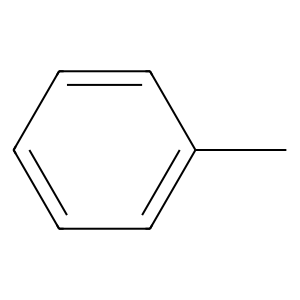

In [5]:
from rdkit.Chem import Draw
img = Draw.MolToImage(m)
img

In [6]:
m2 = Chem.MolFromSmiles('C1CCC1')

print(Chem.MolToMolBlock(m2))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [7]:
m = Chem.MolFromSmiles('C1OC1')

In [8]:
print(m.GetBonds()[0].GetBondType())

SINGLE


In [11]:
print(m.GetAtomWithIdx(0).GetSymbol())
print(m.GetAtomWithIdx(0).GetExplicitValence())
print(m.GetBondWithIdx(0).GetBeginAtomIdx())
print(m.GetBondWithIdx(0).GetEndAtomIdx())

C
2
0
1


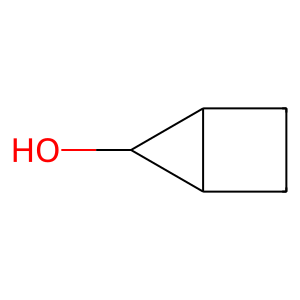

In [13]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
img = Draw.MolToImage(m)
img

In [14]:
m.GetAtomWithIdx(0).IsInRing()

False

In [15]:
m.GetAtomWithIdx(2).IsInRingSize(3)

True

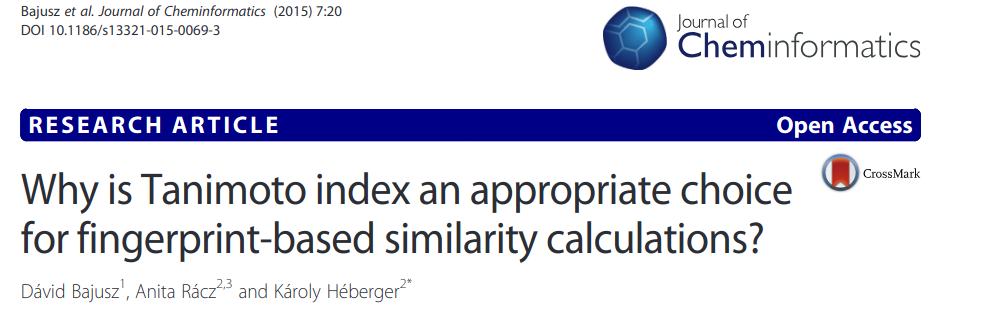

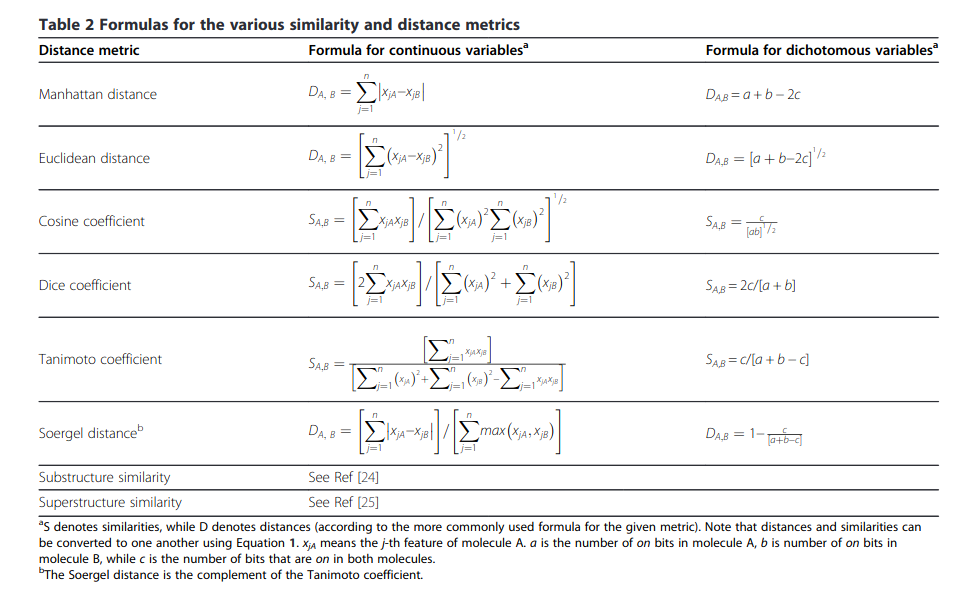

https://greglandrum.github.io/rdkit-blog/posts/2023-10-27-mcswhatsnew.html

In [16]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

In [17]:
mols = [Chem.MolFromSmiles(smi) for smi in """C[C@H]1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O
C1[C@@H]2[C@@H](C2N)CN1C3=C(C=C4C(=O)C(=CN(C4=N3)C5=C(C=C(C=C5)F)F)C(=O)O)F
CN(C)CC[C@@](C1=CC=CC2=CC=CC=C21)([C@H](C3=CC=CC=C3)C4=C(N=C5C=CC(=CC5=C4)Br)OC)O
""".split()]

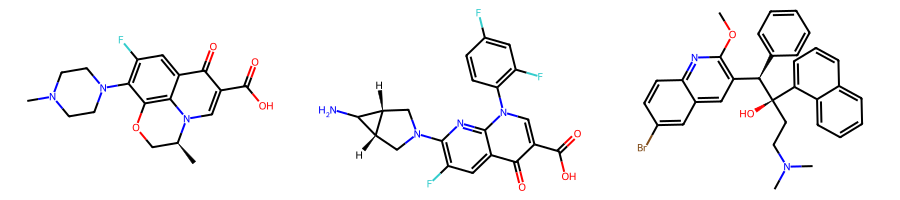

In [18]:
MolsToGridImage(mols, subImgSize=(300, 200))

In [19]:
params = rdFMCS.MCSParameters()
params.AtomTyper = rdFMCS.AtomCompare.CompareElements
params.BondTyper = rdFMCS.BondCompare.CompareOrder
params.BondCompareParameters.RingMatchesRingOnly = True
params.BondCompareParameters.CompleteRingsOnly = True

In [20]:
mcs = rdFMCS.FindMCS(mols, params)

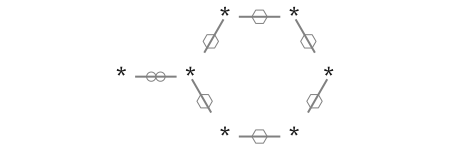

In [22]:
mcs.queryMol

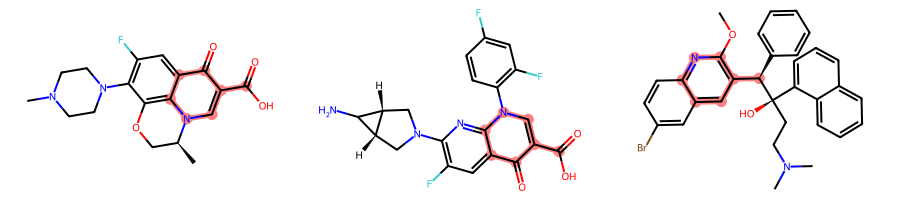

In [21]:
MolsToGridImage(mols, subImgSize=(300, 200), highlightAtomLists=[m.GetSubstructMatch(mcs.queryMol) for m in mols])